<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-просмотр-данных" data-toc-modified-id="Загрузка-и-просмотр-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и просмотр данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Загрузка и просмотр данных

In [1]:
!pip install ydata-profiling
!pip install matplotlib==3.7.3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25
POINTS = 500 # количество скважин, исследумых при разведке региона
BEST_POINTS = 200 # количество лучших скважин, выбранных при помощи помощью машинного обучения
BUDGET = 10e9 # бюджет на разработку скважин в регионе (тыс. рублей)
BARREL_PRICE = 450e3 # доход с каждой единицы продукта (тыс. рублей на 1 тыс. баррелей)

In [4]:
# Выгрузка данных
region = pd.read_csv('/datasets/geo_data_0.csv', decimal = '.')
region_1 = pd.read_csv('/datasets/geo_data_1.csv', decimal = '.')
region_2 = pd.read_csv('/datasets/geo_data_2.csv', decimal = '.')

In [5]:
# функция вывода информации о данных
def data_info(data):
    display(data.head(20))
    data.info()

In [6]:
data_info(region)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_info(region_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_info(region_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Предобработка данных

In [9]:
# функция вывода пропусков и дупликатов
def data_dup_isna(data):
    print('Количество дупликатов')
    display(data.duplicated().sum())
    print('Количество пропусков')
    display(data.isna().sum())

In [10]:
data_dup_isna(region)

Количество дупликатов


0

Количество пропусков


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [11]:
data_dup_isna(region_1)

Количество дупликатов


0

Количество пропусков


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
data_dup_isna(region_2)

Количество дупликатов


0

Количество пропусков


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

В данных отсутсвуют пропуски и дупликаты

### Исследовательский анализ данных

In [13]:
def data_hist(data):
    for row in data.columns:
        if data[row].dtype!=object:
            if row == 'id':
                continue
            else:
                plt.hist(data[row], bins = 50)
                plt.xlabel(row)
                plt.ylabel('count')
                plt.title(f'Распределение {row}')
                plt.show()

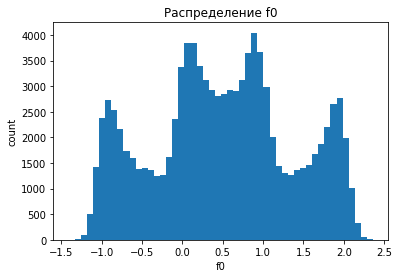

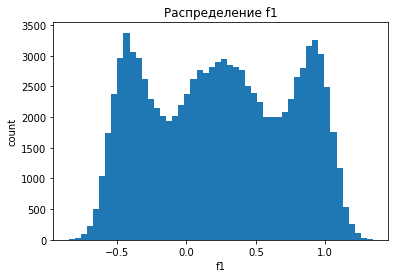

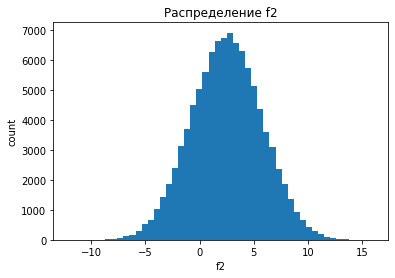

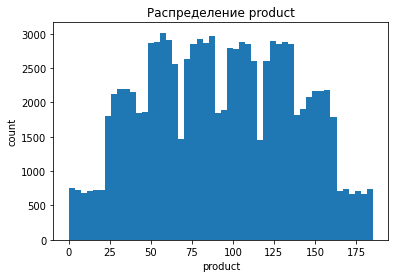

In [14]:
data_hist(region)

Распределение f2 -нормальное, у остальных признаков - ненормальное с множественными пиками.

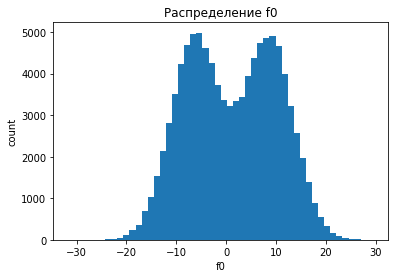

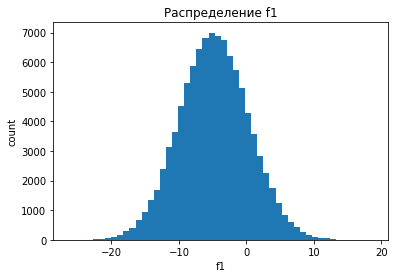

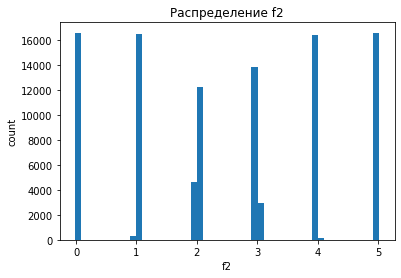

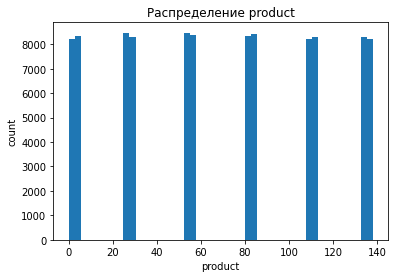

In [15]:
data_hist(region_1)

Распределение f1 -нормальное, у f0 - ненормальное с 2 пиками. Признаки f2 и product в виде дискретных величин.

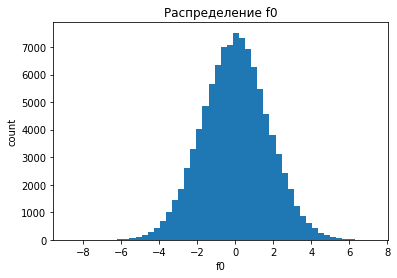

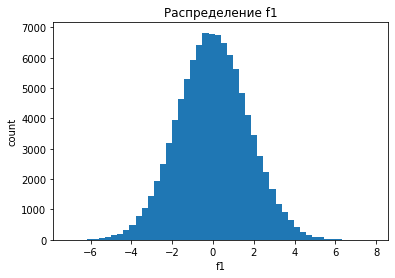

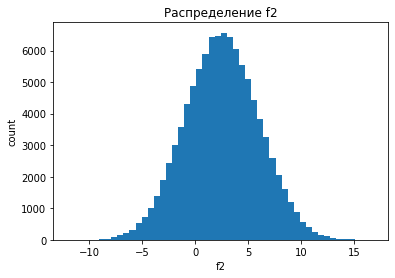

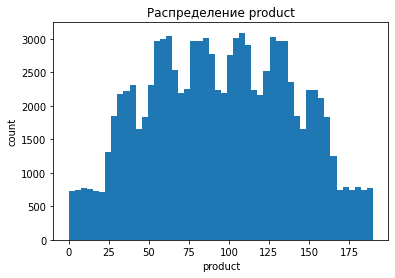

In [16]:
data_hist(region_2)

Распределение всех признаков, кроме product, нормальное.

### Корреляционный анализ

In [17]:
region.corr(numeric_only=True)

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [18]:
region_1.corr(numeric_only=True)

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [19]:
region_2.corr(numeric_only=True)

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Сильную зависимость можем видеть между признаками f2 и product в таблице region_1 (в виде дискретных величин). 

## Обучение и проверка модели

Целевым признаком принимаем product:

In [21]:
def predictoins_region(df):
    features = df.drop(['product','id'],axis = 1) 
    target = df['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = TEST_SIZE, random_state=RANDOM_STATE)
    model = LinearRegression(n_jobs=-1)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    
    mse = mean_squared_error(target_valid, predictions)
    rmse = mse ** 0.5

    product_mean = df['product'].mean()
    product_mean_pred = predictions.mean()
    
    target_valid = target_valid.reset_index(drop=True)
    
    return predictions, rmse, product_mean_pred, target_valid

In [22]:
predictions_0, rmse_0, product_mean_pred_0, target_valid_0 = predictoins_region(region)
print(f'RMSE region_0: {round(rmse_0, 2)}')
print(f'Средний объем продукта по предсказанию в region_0: {round(product_mean_pred_0, 2)}')

RMSE region_0: 37.76
Средний объем продукта по предсказанию в region_0: 92.4


In [23]:
predictions_1, rmse_1, product_mean_pred_1, target_valid_1 = predictoins_region(region_1)
print(f'RMSE region_1: {round(rmse_1, 2)}')
print(f'Средний объем продукта по предсказанию в region_1: {round(product_mean_pred_1, 2)}')

RMSE region_1: 0.89
Средний объем продукта по предсказанию в region_1: 68.71


In [24]:
predictions_2, rmse_2, product_mean_pred_2, target_valid_2 = predictoins_region(region_2)
print(f'RMSE region_2: {round(rmse_2, 2)}')
print(f'Средний объем продукта по предсказанию в region_2: {round(product_mean_pred_2, 2)}')

RMSE region_2: 40.15
Средний объем продукта по предсказанию в region_2: 94.77


RMSE лучше всего в регионе region_1 - вероятно из-за сильной зависимости между f2 и product. Показатели объема продукта выше в регионах 0 и 2.

## Подготовка к расчёту прибыли

In [25]:
break_even = BUDGET / (BARREL_PRICE * BEST_POINTS)
print(f'Достаточный объём нефти для безубыточной разработки = {break_even:.2f} тыс. баррелей.')

Достаточный объём нефти для безубыточной разработки = 111.11 тыс. баррелей.


Среднее значение запаса сырья по всем скважинам для каждого из регионов меньше, чем точка безубыточности: 111.11 тыс., значит на данный момент бизнес невыгоден и надо подбирать наиболее выгодные скважины:
* region - 92.4 < 111.11;
* region_1 - 68.71 < 111.11;
* region_2 - 94.77 < 111.11.

In [26]:
def revenue(target, predictions, count):
    selected = target[(predictions.sort_values(ascending=False)).index][:count]
    return (BARREL_PRICE * selected.sum() - BUDGET)

## Расчёт прибыли и рисков 

In [27]:
print(f'Прибыль region_0: {round(revenue(target_valid_0, pd.Series(predictions_0), BEST_POINTS), 2)}')

Прибыль region_0: 3359141114.46


In [28]:
print(f'Прибыль region_1: {round(revenue(target_valid_1, pd.Series(predictions_1), BEST_POINTS), 2)}')

Прибыль region_1: 2415086696.68


In [29]:
print(f'Прибыль region_2: {round(revenue(target_valid_2, pd.Series(predictions_2), BEST_POINTS), 2)}')

Прибыль region_2: 2598571759.37


In [30]:
STATE = np.random.RandomState(RANDOM_STATE)
def BootStrap(target, valid, count, state):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=count, replace=True, random_state=state)
        probs_subsample = valid[target_subsample.index]
        profit = revenue(target_subsample, probs_subsample, BEST_POINTS)
        values.append(profit)
        
    values = pd.Series(values)
    return values

In [31]:
values_0 = BootStrap(target_valid_0, pd.Series(predictions_0), POINTS, STATE)
print("Средняя выручка region_0:", round(values_0.mean(),2))
print("Доверительный интервал (95%) region_0:", [round(values_0.quantile(0.025),2), round(values_0.quantile(0.975),2)])

risk_0 = values_0[values_0 < 0].count() / values_0.count() * 100
print("Риск получения убытков region_0:", round(risk_0, 2))

Средняя выручка region_0: 427847560.46
Доверительный интервал (95%) region_0: [-97249829.57, 954215192.71]
Риск получения убытков region_0: 5.5


In [32]:
values_1 = BootStrap(target_valid_1, pd.Series(predictions_1), POINTS, STATE)
print("Средняя выручка region_1:", round(values_1.mean(),2))
print("Доверительный интервал (95%) region_1:", [round(values_1.quantile(0.025),2), round(values_1.quantile(0.975),2)])

risk_1 = values_1[values_1 < 0].count() / values_1.count() * 100
print("Риск получения убытков region_1:", round(risk_1,2))

Средняя выручка region_1: 511530218.15
Доверительный интервал (95%) region_1: [91700564.14, 921455668.33]
Риск получения убытков region_1: 0.6


In [33]:
values_2 = BootStrap(target_valid_2, pd.Series(predictions_2), POINTS, STATE)
print("Средняя выручка region_2:", round(values_2.mean(),2))
print("Доверительный интервал (95%) region_2:", [round(values_2.quantile(0.025),2), round(values_2.quantile(0.975),2)])

risk_2 = values_2[values_2 < 0].count() / values_2.count() * 100
print("Риск получения убытков region_2:", round(risk_2,2))

Средняя выручка region_2: 408545681.21
Доверительный интервал (95%) region_2: [-120624872.94, 960859440.73]
Риск получения убытков region_2: 7.5


Для разработки месторождения подходит region_1 - прибыль больше всех 3 регионов, доверительный интервал - без отрицательной прибыли, риск убытков менее 1%.

Общий вывод:
* По всем метрикам для разработки подходит Регион №1. Но необходимо уточнить уточнить по дискретным показателям у заказчика - нет ли ошибки и если что переобучить модель.
* Вторым по значимости вариантом является Регион №0. Прибыль и риск меньше, чем у Региона №2.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован